In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split

raw_data = pd.read_csv("C:/Users/Durvesh/Desktop/Machine Learning ppts/Admission_Predict_Ver1.1.csv", delimiter=',', encoding="utf-8-sig")

raw_data.head()







,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
raw_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [30]:
raw_data = raw_data.drop(columns=['Serial No.','TOEFL Score','University Rating','SOP','CGPA','Research'])

In [31]:
raw_data.isnull() # check missing values

,GRE Score,LOR,Chance of Admit
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
495,False,False,False
496,False,False,False
497,False,False,False
498,False,False,False


In [32]:
raw_data.isnull().sum() # returns number of missing values in dataset

GRE Score           0
LOR                 0
Chance of Admit     0
dtype: int64

<ipython-input-33-dfbefb0a53f8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  raw_data.columns = raw_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


     gre_score  chance_of_admit
0          337             0.92
1          324             0.76
2          316             0.72
3          322             0.80
4          314             0.65
..         ...              ...
495        332             0.87
496        337             0.96
497        330             0.93
498        312             0.73
499        327             0.84

[500 rows x 2 columns]
R-squared:0.6857609801903284


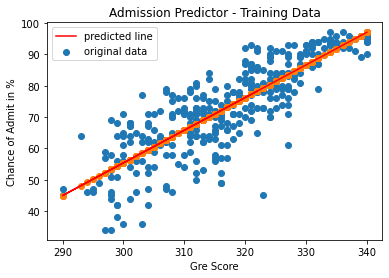

R-squared:0.5910844839999462


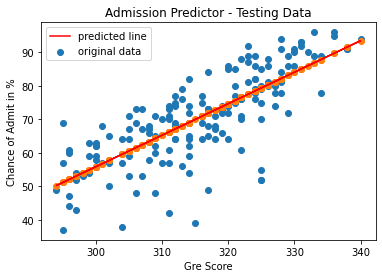

In [33]:
# Add _instead of space in all column headers
raw_data.columns = raw_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Drop lor column  
raw_data = raw_data.drop(columns=['lor'])
print(raw_data)

Xaxis = raw_data['gre_score']
Yaxis = raw_data['chance_of_admit']

X_train,X_test,y_train,y_test = train_test_split(Xaxis,Yaxis,test_size = 0.33,random_state = 0)

# Training Data
x_dash_train = np.array(X_train)
y_dash_train = np.array(y_train  * 100)

plt.scatter(x_dash_train, y_dash_train,label = 'original data')

slope,intercept, r_value, p_value, std_err = stats.linregress(x_dash_train, y_dash_train)

print("R-squared:" + str(r_value**2)) 

plt.plot(x_dash_train,slope * x_dash_train + intercept,'r',label = 'predicted line')
plt.scatter(x_dash_train,slope * x_dash_train + intercept)
plt.title('Admission Predictor - Training Data')
plt.legend()
plt.xlabel('Gre Score')
plt.ylabel('Chance of Admit in %')
plt.savefig('Output.png')
plt.show()


# Testing Data
x_dash_test = np.array(X_test)
y_dash_test = np.array(y_test  * 100)

plt.scatter(x_dash_test, y_dash_test,label = 'original data')

slope,intercept, r_value, p_value, std_err = stats.linregress(x_dash_test, y_dash_test)

print("R-squared:" + str(r_value**2)) 

plt.plot(x_dash_test,slope * x_dash_test + intercept,'r',label = 'predicted line')
plt.scatter(x_dash_test,slope * x_dash_test + intercept)
plt.title('Admission Predictor - Testing Data')
plt.legend()
plt.xlabel('Gre Score')
plt.ylabel('Chance of Admit in %')
plt.savefig('Output.png')
plt.show()
